In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [185]:
X,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)
X.shape

(500, 2)

In [186]:
np.unique(y)

array([0, 1, 2, 3, 4])

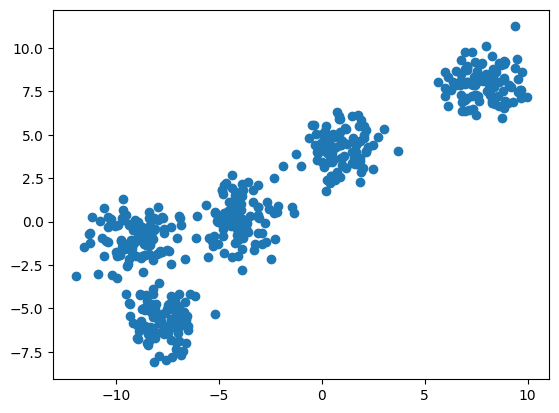

In [187]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [188]:
def normalise(X):
    u = X.mean(axis=0)
    std = X.std(axis=0)
    return (X-u)/std

X = normalise(X)
X

array([[-7.21579161e-01, -1.68850150e+00],
       [ 1.68396643e+00,  1.34210435e+00],
       [-1.91844591e-01, -2.57447162e-01],
       [-1.03676225e+00, -1.66567235e+00],
       [-7.89999004e-01, -1.30355830e+00],
       [-3.57261529e-01, -2.30514041e-01],
       [-1.18615340e+00, -6.51003866e-01],
       [-7.35650004e-01, -1.81289799e+00],
       [ 1.57252620e+00,  1.69461511e+00],
       [-6.90524215e-01, -1.37871186e+00],
       [ 1.77864345e+00,  1.01456956e+00],
       [-2.36291454e-01, -2.09181782e-01],
       [ 1.79614772e+00,  1.70762982e+00],
       [-7.03720232e-01, -1.85818359e+00],
       [-3.57321244e-01, -1.33205135e-01],
       [-1.07316170e+00, -1.46871696e+00],
       [ 1.70436696e+00,  1.21450574e+00],
       [-6.78384281e-01, -1.48017783e+00],
       [-7.84715738e-01, -1.49575997e+00],
       [ 1.49648329e+00,  1.09341045e+00],
       [ 6.84884005e-01,  4.98059144e-01],
       [ 6.18388697e-01,  4.69815000e-01],
       [-8.61991668e-01, -1.57524921e+00],
       [-2.

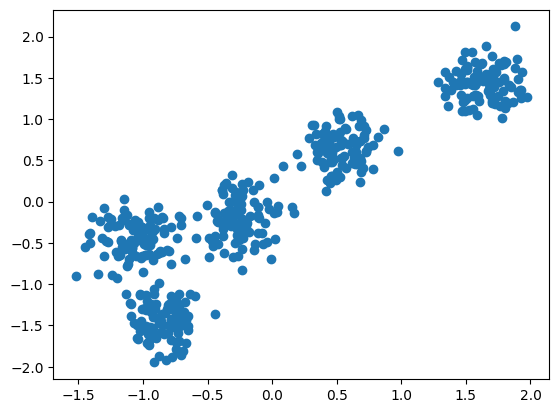

In [189]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [190]:
def init(k):
    centroids = {}
    colors = ["green","red","blue","yellow","orange"]
    for i in range(k):
        center = 2*(2*np.random.random((n_features,)) - 1)
        
        centroids[i] = {
            'center' : center,
            'color' : colors[i],
            'points' : []
        }
    return centroids
#     return centroids

centroids=init(k)

In [191]:
def distance(p,q):
    return np.sqrt(np.sum((p-q)**2))
def assignptstocluster(X,centroids):
    m=X.shape[0]
    for i in range(m):
        clist=[]
        cx=X[i]
        for kx in range(k):
            d=distance(centroids[kx]['center'],cx)
            clist.append(d)
        cluster_id=np.argmin(clist)
        centroids[cluster_id]['points'].append(cx)

            
        

In [192]:
assignptstocluster(X,centroids)

In [193]:
centroids

{0: {'center': array([ 0.79588959, -1.87969045]),
  'color': 'green',
  'points': []},
 1: {'center': array([-1.82468833,  1.15310376]),
  'color': 'red',
  'points': []},
 2: {'center': array([1.22308541, 1.46504643]),
  'color': 'blue',
  'points': [array([1.68396643, 1.34210435]),
   array([1.5725262 , 1.69461511]),
   array([1.77864345, 1.01456956]),
   array([1.79614772, 1.70762982]),
   array([1.70436696, 1.21450574]),
   array([1.49648329, 1.09341045]),
   array([0.684884  , 0.49805914]),
   array([0.6183887, 0.469815 ]),
   array([1.50666922, 1.26099862]),
   array([1.55233798, 1.11769937]),
   array([0.65060369, 0.5165816 ]),
   array([1.76044724, 1.16475973]),
   array([1.88051137, 1.61449179]),
   array([1.55498519, 1.41257811]),
   array([1.45344948, 1.41767057]),
   array([1.78790206, 1.33973835]),
   array([1.58282422, 1.04501618]),
   array([0.57169857, 0.41060652]),
   array([0.72400387, 0.86990712]),
   array([1.70458073, 1.76212678]),
   array([1.79109718, 1.68389753]

In [194]:
def updateCluster(centroids):
    for kx in range(k):
        pts=np.array(centroids[kx]['points'])
        if(pts.shape[0]>0):
            newcenter=pts.mean(axis=0)
            centroids[kx]['center']=newcenter 
            centroids[kx]['points']=[]
        

In [195]:
def plotClusters(centroids): 
    for kx in range(k):
        pts=np.array(centroids[kx]['points'])
        if(pts.shape[0]>0):
            plt.scatter(pts[:,0],pts[:,1],color=centroids[kx]['color'])
        uk=centroids[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')
# def plotClusters(centroids):

#     for kx in range(k):
#         pts = np.array(centroids[kx]['points'])

#         # Plot the Points
#         if(pts.shape[0]>0):
#             plt.scatter(pts[:,0],pts[:,1],color=centroids[kx]['color'])

#         # Plot the Cluster Center (Centroid)
#         uk = centroids[kx]['center']
#         plt.scatter(uk[0],uk[1],color='black',marker='*')


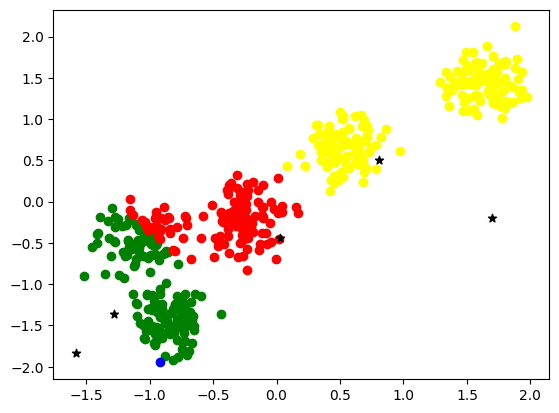

In [196]:

centroids = init(k)
assignptstocluster(X,centroids)
plotClusters(centroids)


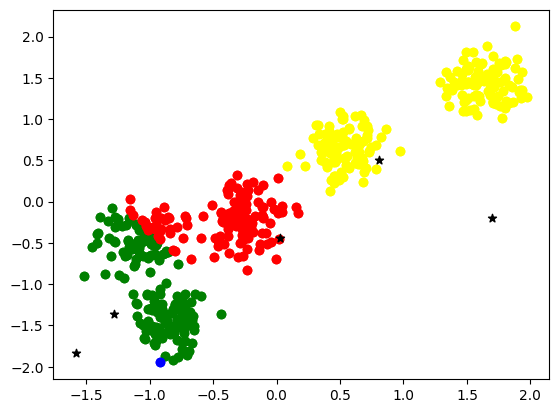

In [197]:


assignptstocluster(X,centroids)
plotClusters(centroids)
updateCluster(centroids)